In [1]:
## Importing the Dependecies/


In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Here the step is to avoid OOM Errors by setting GPU Memory consumption growth

In [4]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [5]:
## Removing the Dodgy Images

In [6]:
import cv2
import imghdr

In [7]:
img_ext = ['jpg','png','jpeg','bmp']

In [8]:
data_dir= 'data'

In [9]:
os.listdir(os.path.join(data_dir,'sad'))

['images26.jpg',
 'images32.jpg',
 'image22.jpeg',
 'sad-quotes-about-life.jpg',
 'sad-people-icon-2CCHXB2.jpg',
 'dreamstime_s_101440985.jpg',
 'aid12707023-v4-1200px-Make-a-Sad-Person-Happy-Step-10.jpg',
 'images33.jpg',
 'sue.jpg',
 'images27.jpg',
 'image18.jpeg',
 'man-portrait-contemplative-sad-looking-at-camera-732x549-thumbnail.jpg',
 '640px-Crying-girl.jpg',
 'images31.jpg',
 'a-sad-woman-sitting-by-the-window.jpg',
 'images19.jpg',
 'iStock_000001932580XSmall.jpg',
 'pexels-photo-4584665.jpeg',
 'image-asset.jpeg',
 'images18.jpg',
 'images24.jpg',
 'images30.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'sadness-inside-out-today-main-tease-191018.jpg',
 'images34.jpg',
 'images20.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg',
 'depressed-woman-sitting-chair-dark-room-home_53476-2193.jpg',
 'images21.jpg',
 'images35.jpg',
 'images23.jpg',
 'images37.jpg',
 'image19.jpeg',
 'sad.jpg',
 'person-super-depressed.jpg',
 'image23.jpeg',
 'nal-man-digital-illustration-transparent-backgrou

In [10]:
import os
import cv2
import imghdr

# Looping over images
for img_class in os.listdir(data_dir):
    img_class_dir = os.path.join(data_dir, img_class)
    
    # Skip if the current item is not a directory
    if not os.path.isdir(img_class_dir):
        continue
    
    for image in os.listdir(img_class_dir):
        image_path = os.path.join(img_class_dir, image)
        
        try:
            # Process the image
            img = cv2.imread(image_path)
            
            # Check the file extension
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print('Image is not in the extension list: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Image has an issue: {}'.format(image_path))


In [11]:
## Load Data

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 272 files belonging to 3 classes.
Metal device set to: Apple M1 Pro


In [13]:
data_itereator = data.as_numpy_iterator()

In [14]:
batch = data_itereator.next()

In [15]:
batch[0].shape

(32, 256, 256, 3)

In [16]:
# batch[0] - images and batch[1]-labels
batch[1]

array([2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

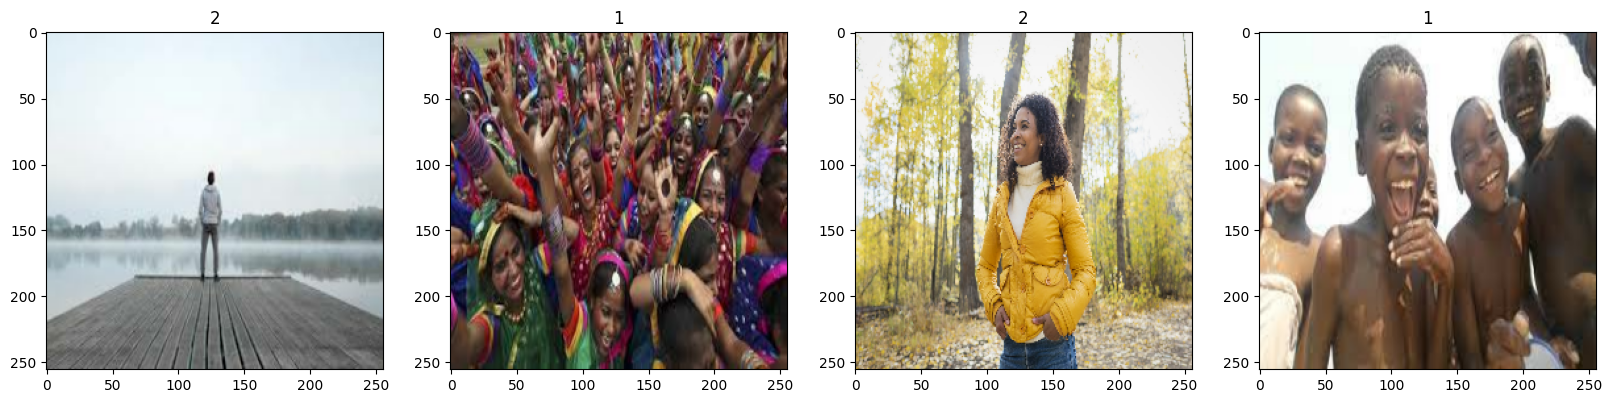

In [17]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
'''min value is - 0
max value is 255 so we'll process them between 0 to 1'''
scaled = batch[0]/255

In [19]:

scaled

array([[[[0.8666667 , 0.9254902 , 0.9529412 ],
         [0.8671032 , 0.9259268 , 0.9533778 ],
         [0.87058824, 0.92941177, 0.95686275],
         ...,
         [0.81641394, 0.88700217, 0.92621785],
         [0.8156863 , 0.8862745 , 0.9254902 ],
         [0.8156863 , 0.8862745 , 0.9254902 ]],

        [[0.8666667 , 0.9254902 , 0.9529412 ],
         [0.8671032 , 0.9259268 , 0.9533778 ],
         [0.87058824, 0.92941177, 0.95686275],
         ...,
         [0.81641394, 0.88700217, 0.92621785],
         [0.8156863 , 0.8862745 , 0.9254902 ],
         [0.8156863 , 0.8862745 , 0.9254902 ]],

        [[0.8677926 , 0.92661613, 0.9540671 ],
         [0.8681038 , 0.9269273 , 0.9543783 ],
         [0.87079716, 0.9296207 , 0.95707166],
         ...,
         [0.81641394, 0.88700217, 0.92621785],
         [0.8156863 , 0.8862745 , 0.9254902 ],
         [0.8156863 , 0.8862745 , 0.9254902 ]],

        ...,

        [[0.3236477 , 0.3236477 , 0.3236477 ],
         [0.40283394, 0.40283394, 0.40283394]

# 2.Data Pre Processing

## 2.1 Scale the Data

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 272 files belonging to 3 classes.


In [21]:
data = data.map(lambda x,y : (x/255,y))

In [22]:
scaled_iter = data.as_numpy_iterator()


In [23]:
batch = scaled_iter.next()

In [24]:
batch[0].max()

1.0

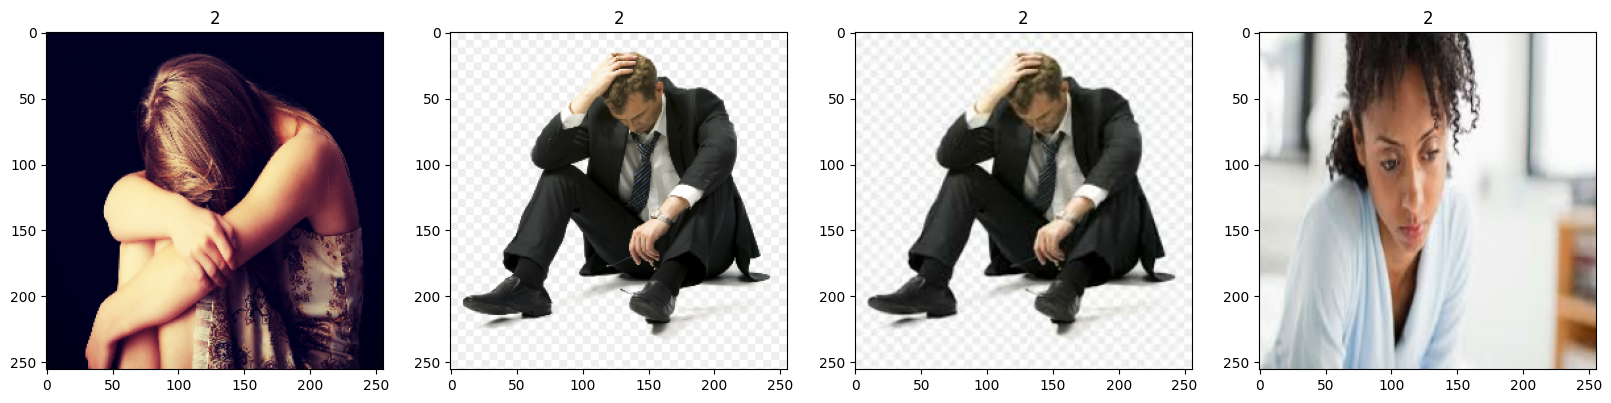

In [25]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [26]:
len(data)

9

In [27]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.2)+1
val_size = int(len(data)*.1)+1

In [28]:
val_size+test_size+train_size

9

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
len(val)

1

# 3.Deep Learning Model

## 3.1Building the Deeep Learning Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import TensorBoard



In [32]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Set the model to use GPU
    
        
        
    print("Model is fitting on GPU.")
else:
    print("No GPU available. Model is fitting on CPU.")


Model is fitting on GPU.


In [33]:
log_dir = 'logs'

In [34]:
model2 = Sequential()

In [36]:
model2.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model2.add(MaxPooling2D())

model2.add(Conv2D(32,(3,3),1,activation = 'relu'))
model2.add(MaxPooling2D())

model2.add(Conv2D(16,(3,3),1,activation = 'relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(256,activation ='relu'))
model2.add(Dense(1,activation='sigmoid'))

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [37]:
model2.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [38]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [39]:
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')


In [41]:
with tf.device('GPU:0'):
    hist2 = model2.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])
    print("Model is fitting on GPU.")

Epoch 1/20
6/6 [==============================] - 4s 436ms/step - loss: -7.0379 - accuracy: 0.4844 - val_loss: -39.0462 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 3s 380ms/step - loss: -119.9074 - accuracy: 0.5260 - val_loss: -345.7762 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 3s 389ms/step - loss: -660.0623 - accuracy: 0.5365 - val_loss: -1738.5939 - val_accuracy: 0.4688
Epoch 4/20
6/6 [==============================] - 3s 364ms/step - loss: -2950.9602 - accuracy: 0.5208 - val_loss: -4987.4150 - val_accuracy: 0.5000
Epoch 5/20
6/6 [==============================] - 3s 361ms/step - loss: -8623.2070 - accuracy: 0.5677 - val_loss: -18897.8398 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 3s 354ms/step - loss: -26372.2422 - accuracy: 0.5469 - val_loss: -43080.7031 - val_accuracy: 0.5938
Epoch 7/20
6/6 [==============================] - 3s 354ms/step - loss: -73420.8438 - accuracy: 0.5521 - val_loss: -1

In [43]:
hist2.history

{'loss': [-7.037885665893555,
  -119.90740966796875,
  -660.0623168945312,
  -2950.960205078125,
  -8623.20703125,
  -26372.2421875,
  -73420.84375,
  -189190.890625,
  -397265.71875,
  -862961.0625,
  -1699470.0,
  -3121582.0,
  -5799883.5,
  -9878280.0,
  -17828646.0,
  -24342774.0,
  -41226036.0,
  -60088848.0,
  -85062856.0,
  -125126824.0],
 'accuracy': [0.484375,
  0.5260416865348816,
  0.5364583134651184,
  0.5208333134651184,
  0.5677083134651184,
  0.546875,
  0.5520833134651184,
  0.53125,
  0.5625,
  0.5572916865348816,
  0.5520833134651184,
  0.5416666865348816,
  0.5520833134651184,
  0.546875,
  0.4895833432674408,
  0.5625,
  0.515625,
  0.5364583134651184,
  0.5260416865348816,
  0.5416666865348816],
 'val_loss': [-39.04621124267578,
  -345.7762451171875,
  -1738.5938720703125,
  -4987.4150390625,
  -18897.83984375,
  -43080.703125,
  -115245.28125,
  -316693.90625,
  -552793.0,
  -1265900.75,
  -2712458.5,
  -4817615.5,
  -7720219.5,
  -13673752.0,
  -19762626.0,
  -26

## 3.3 Plot PERFORMANCE

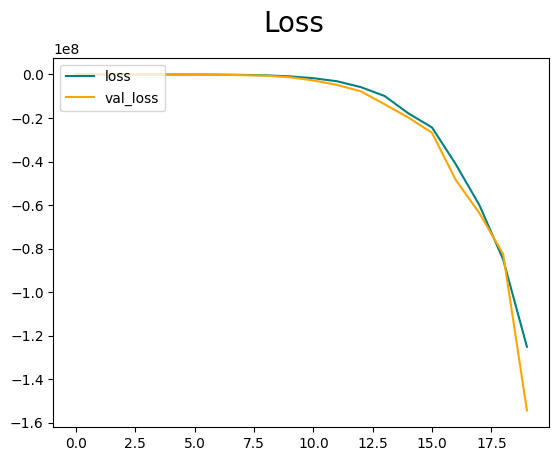

In [44]:
fig = plt.figure()
plt.plot(hist2.history['loss'],color = 'teal',label='loss')
plt.plot(hist2.history['val_loss'],color = 'orange',label ='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

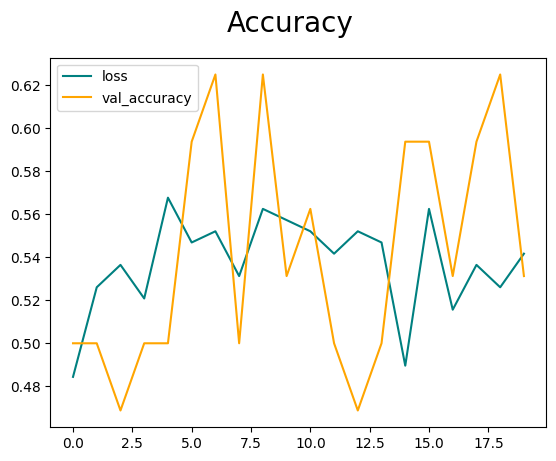

In [45]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'],color = 'teal',label='loss')
plt.plot(hist2.history['val_accuracy'],color = 'orange',label ='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [46]:
%load_ext tensorboard
%tensorboard --logdir=logs --port=6007
